In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi

In [ ]:
df = pd.read_csv('/content/sample_data/uylar_data.csv', index_col=0)
df.head(3)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
#housing = train_set.drop("median_house_value", axis=1)
df1= train_set.drop("price", axis=1)
price_labels = train_set["price"].copy()


In [ ]:
df1.head(5)

,location,district,rooms,size,level,max_levels
3901,"город Ташкент, Мирзо-Улугбекский район, Олой",Мирзо-Улугбекский,3,70.0,4,4
2031,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,97.0,1,8
5176,"город Ташкент, Юнусабадский район, 1-й проезд ...",Юнусабадский,1,18.0,1,4
2041,"город Ташкент, Юнусабадский район, Бодомзор йу...",Юнусабадский,2,55.0,5,5
1079,"город Ташкент, Учтепинский район, Чиланзар 26-...",Учтепинский,3,70.0,1,5


In [ ]:
df1_num = df1.drop(["location","district"],axis=1)
df1_num.head(3)

,rooms,size,level,max_levels
3901,3,70.0,4,4
2031,3,97.0,1,8
5176,1,18.0,1,4


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# bizga kerak ustunlar indekslari
rooms_ix, size_ix, level_ix, max_levels_ix, = 0, 1, 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_size_per_rooms = True):
        self.add_size_per_rooms = add_size_per_rooms
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        level_per_max_levels = X[:, level_ix] / X[:, max_levels_ix]
        max_levels_per_rooms=X[:,max_levels_ix]/X[:,rooms_ix]
        #population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_size_per_rooms: # add_bedrooms_per_room ustuni ixtiyoriy bo'ladi
            size_per_rooms = X[:, size_ix] / X[:, rooms_ix]
            return np.c_[X, level_per_max_levels, max_levels_per_rooms, size_per_rooms]
        else:
            return np.c_[X, level_per_max_levels,max_levels_per_rooms ]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_size_per_rooms=True)),
          ('std_scaler', StandardScaler())             
])

In [ ]:
num_pipeline.fit_transform(df1_num)

array([[ 0.36054758, -0.08390738,  0.13549604, ...,  1.31086184,
        -0.79338991, -0.68159253],
       [ 0.36054758,  0.65723604, -1.22172678, ..., -1.80568674,
        -0.02172025,  0.45762035],
       [-1.51208001, -1.51129471, -1.22172678, ..., -1.36046552,
         0.74994942, -1.35668165],
       ...,
       [-0.57576621, -0.68780202, -0.76931918, ..., -0.47002306,
        -0.40755508, -0.5972064 ],
       [ 1.29686137,  6.77853171,  0.13549604, ...,  1.31086184,
        -0.98630732,  6.49122934],
       [ 1.29686137,  0.51998726,  0.13549604, ...,  1.31086184,
        -0.98630732, -0.7237856 ]])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df1_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
uylar_prepared = full_pipeline.fit_transform(df1)

In [ ]:
uylar_prepared[0:5,:]

array([[ 0.36054758, -0.08390738,  0.13549604, -0.78098717,  1.31086184,
        -0.79338991, -0.68159253,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.36054758,  0.65723604, -1.22172678,  0.75986784, -1.80568674,
        -0.02172025,  0.45762035,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-1.51208001, -1.51129471, -1.22172678, -0.78098717, -1.36046552,
         0.74994942, -1.35668165,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [-0.57576621, -0.49565373,  0.58790364, -0.39577342,  1.31086184,
        -0.11817895, -0.15417916,  0.        ,  0.        ,  0.        ,
         0.   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

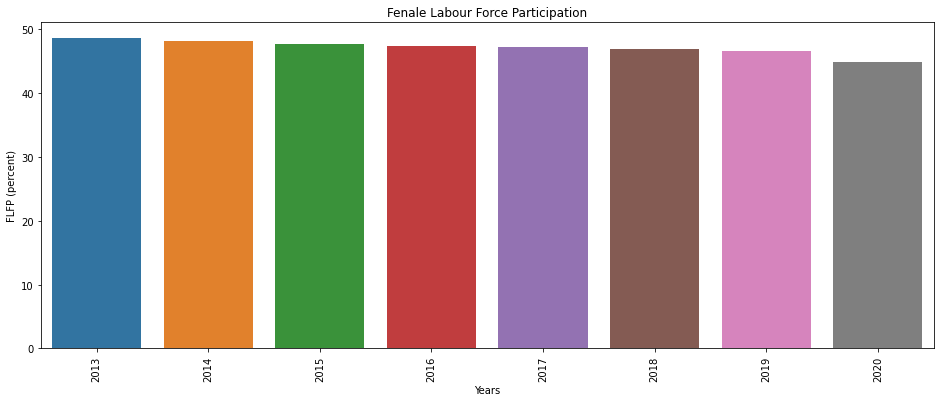

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=[2013,2014,2015,2016,2017,2018,2019,2020], y=[48.69,48.23,47.76,47.42,47.21,46.93,46.66,44.84])
plt.title("Fenale Labour Force Participation")
plt.xlabel("Years")
plt.ylabel("FLFP (percent)")
#plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=90)

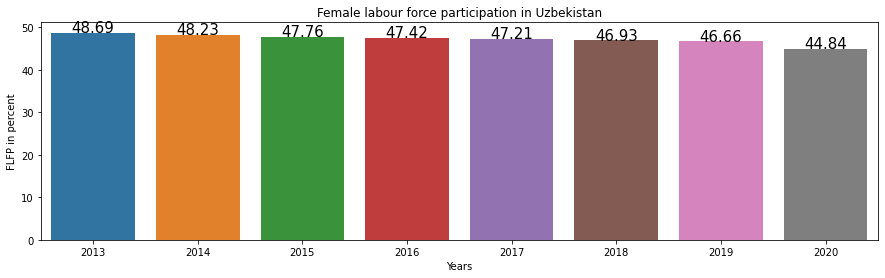

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {"Years": [2013,2014,2015,2016,2017,2018,2019,2020],
        "FLFP in percent": [48.69,48.23,47.76,47.42,47.21,46.93,46.66,44.84]}
df = pd.DataFrame(data, columns=['Years', 'FLFP in percent'])
plt.figure(figsize=(15, 4))
plots = sns.barplot(x="Years", y="FLFP in percent", data=df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Female labour force participation in Uzbekistan")
plt.show()

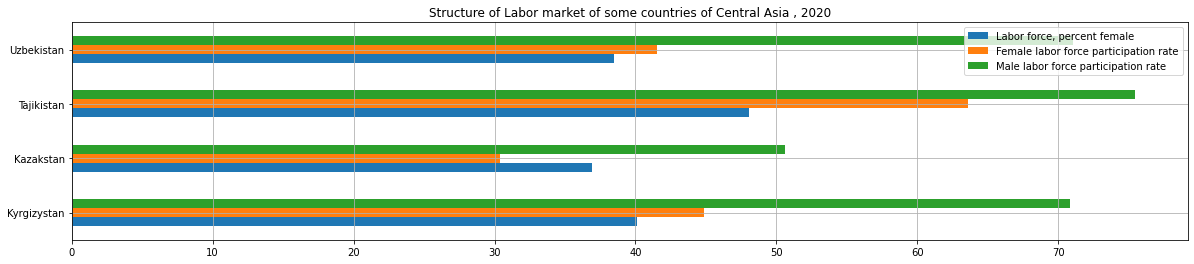

In [ ]:
#plt.figure(figsize=(15, 12))
plotdata = pd.DataFrame({
    "Labor force, percent female":[40.12,36.90,48.05,38.47],
    "Female labor force participation rate":[44.84,30.39,63.62,41.56],
    "Male labor force participation rate":[70.80,50.63,75.41,71.04]
    }, 
    index=["Kyrgizystan","Kazakstan","Tajikistan","Uzbekistan"]
)
plotdata.plot(kind="barh", figsize=(10,4))
plt.title("Structure of Labor market of some countries of Central Asia , 2020")
plt.grid()
plt.xlabel("")
plt.ylabel("")
plt.show()